# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organising Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](kohonen.png)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

### Example 10x10 network after 100 iterations

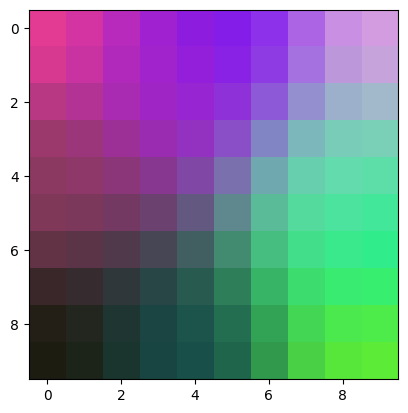

In [7]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread("100.png"))

### Example 100x100 network after 1000 iterations

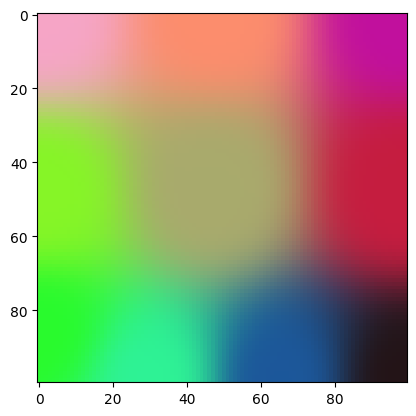

In [8]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread("1000.png"))

## Challenge

Sam has written an implementation of a Self Organising Map. Consider the following criteria when assessing Sam's code:

- Could the code be made more efficient? A literal interpretation of the instructions above is not necessary.
- Is the code best structured for later use by other developers and in anticipation of productionisation?
- How would you approach productionising this application?
- Anything else you think is relevant.

In [ ]:
# kohonen.py
import matplotlib.pyplot as plt
import numpy as np


def train(input_data, n_max_iterations, width, height):
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = np.random.random((width, height, 3))
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):
        σt = σ0 * np.exp(-t / λ)
        αt = α0 * np.exp(-t / λ)
        for vt in input_data:
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))
            for x in range(width):
                for y in range(height):
                    di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))
                    θt = np.exp(-(di**2) / (2 * (σt**2)))
                    weights[x, y] += αt * θt * (vt - weights[x, y])
    return weights


if __name__ == "__main__":
    # Generate data
    input_data = np.random.random((10, 3))
    image_data = train(input_data, 100, 10, 10)

    plt.imsave("100.png", image_data)

    # Generate data
    input_data = np.random.random((10, 3))
    image_data = train(input_data, 1000, 100, 100)

    plt.imsave("1000.png", image_data)

### 1. Nested Loop
Nested loops for weight updates are extremely inefficient. For the second example (1000 iterations, 10 samples, 100×100 grid), this means 100 million weight updates.

```python
for t in range(n_max_iterations):
    ....
    for vt in input_data:
        ....
        for x in range(width):
            for y in range(height):
                di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))
                θt = np.exp(-(di ** 2) / (2*(σt ** 2)))
                weights[x, y] += αt * θt * (vt - weights[x, y])
```
- This iterates through every single position in the grid for each input vector, resulting in O(n_iterations × n_samples × width × height) operations.

- Improvement: Use vectorized operations, which reduces complexity from O(n_iterations × n_samples × width × height) to effectively O(iterations × samples) with vectorized operations. For a 100×100 map, this can be 100x faster


a.  Memory Access Pattern: The `for x in range(width): for y in range(height)` pattern isn't cache-friendly and doesn't leverage NumPy's optimized operations.
- Improvement: Use vectorized operations that process the entire weight matrix simultaneously, leveraging NumPy's memory-optimized implementations.



### 2.  Redundant Distance Calculation

- Problem: `(x - bmu_x)² + (y - bmu_y)²` is recalculated for every pixel, every sample, every iteration.
- Improvement: Pre-compute a distance matrix once at initialization. Create coordinate grids and calculate all pairwise distances between neurons upfront.

### 3. Repeated Exponential Calculations
- Problem: np.exp(-t/λ) is computed twice per iteration for both σt and αt.
- Improvement: Calculate the decay factor once per iteration and reuse it for both parameters.

### 4. BMU Search Inefficiency

```python
# Current implementation - checking EVERY neuron
bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
```
- Checks distance to EVERY neuron to find the minimum
- Improvement: Use spatial data structures for indexing (KD-tree), Instead of checking distance to every neuron (O(width × height)), the KD-tree finds the BMU in O(log n) time

### 5. BMU Search Bug
- Problem: `weights - vt` creates unexpected broadcasting behavior. The subtraction happens between a (width, height, 3) array and a (3,) array, which works but is semantically incorrect.
- Improvement: Reshape the input vector properly or use explicit broadcasting. Calculate distances as `np.sum((weights - vt[None, None, :]) ** 2, axis=2)` to make the operation explicit.

### 6. Numbers Approaching Zero
1. Sigma Approaching Zero
    - Problem: As training progresses, σt → 0 causes division by very small numbers in the neighborhood function, leading to numerical instability.
    - Improvement: Set a minimum threshold for `σt (e.g., σt = max(σ0 * np.exp(-t/λ), 0.01))` to prevent division by near-zero values.

2. Lambda Division by Zero
    - Problem: When σ0 = 1, np.log(σ0) = 0, causing λ = n_max_iterations / 0.
    - Improvement: Add bounds checking: λ = n_max_iterations / max(np.log(σ0), 1e-10) or use a different decay schedule when σ0 is small.

### 7. No Input Shuffling
- Problem: Processing samples in the same order every iteration can create learning biases and prevent proper exploration of the input space.
- Improvement: Shuffle the input data at the beginning of each epoch to ensure random presentation order.

### 8. No Input Normalization
- Problem: Different feature scales cause biased distance calculations. Input data and weights aren't normalized, can cause scale-dependent behavior. Features with larger scales dominate distance calculations.

- Improvement: Normalize input data to [0,1] or standardize to zero mean and unit variance before training.

### 9. No input validation
- Problem: No checks for positive dimensions, compatible data shapes, or non-empty inputs.
- Improvement: Add validation functions to check input dimensions, ensure non-empty arrays, and verify that input data has the correct number of features.

### 10. No Progress Monitoring
- Problem: Can't track training progress for long-running sessions.
- Improvement: Add optional progress bars, periodic loss calculation, or callback functions.

### 11. No Reproducibility
- Improvement:Add seed parameter

### 12. Hard-coded values
- Problem: All parameters are hardcoded, making experimentation and tuning difficult.
- Improvement: Create a configuration system with parameter validation and default values.

### Training & Learning Issues
- `θt = np.exp(-(di ** 2) / (2*(σt ** 2)))` Never truly zero: Gaussian function affects all neurons regardless of distance (computational waste)
- No cutoff radius: Distant neurons still get tiny updates
- Fixed Grid Topology: Only rectangular, no hexagonal or toroidal
- No Convergence Detection: Runs all iterations regardless
- No Early Stopping: Wastes computation when converged
- Fixed Decay Schedule: Can't adapt to data complexity
- Aggressive Decay: Both α and σ decay too quickly
- No Learning Rate Scheduling: No warm-up or adaptive rates
- Online-Only Learning: No batch or mini-batch options
- Exponential underflow: Large negative exponents cause silent underflow to 0
- Weight explosion: No bounds on weight updates can cause weights to grow unbounded
- Floating point precision loss: Repeated small updates may be lost due to precision

### Architecture & Design Issues
- No Class Structure: Procedural design limits extensibility
- No Configuration Management: Parameters scattered throughout, magic numbers
- No Model Persistence: Can't save/load trained models
- No Checkpointing: Can't save checkpointing.
- No Incremental Training: Can't continue training or adapt to new data
- No Distance Metric Options: Only Euclidean distance
- No Initialization Strategies: Only random initialization (Simple and computationally inexpensive, but may lead to slower convergence if initial weights are far from the input data distribution), 
- Single Output Format: Returns only weights, no metadata
- No Callback System: Can't monitor or intervene during training

### Monitoring & Debugging Issues

- No Logging System: Can't track training history
- No Error Reporting: Silent failures
- No Profiling Support: Can't identify bottlenecks
- No Debug Mode: Can't inspect intermediate states
- No Metrics Tracking: No quantization error, topographic error
- No Unit Tests: No test coverage, edge case
- No type hints

### Robustness & Production Issues

- No Random Seed Control: Non-reproducible results
- No Thread Safety: Not safe for concurrent use
- No Memory Management: Large maps can cause OOM
- No GPU Support: Missing CUDA/OpenCL acceleration, 
- No Distributed Training: Can't scale to large datasets
- No Model Versioning: No compatibility checks

Code Quality & Architecture
- Core Algorithm Improvements

  - Vectorize operations: Replace nested loops with NumPy broadcasting for 10-100x speedup
  - Batch processing: Process multiple input vectors simultaneously
  - Early stopping: Add convergence detection to avoid unnecessary iterations
  - Incremental training: Support updating an existing model with new data
  - Distance metrics: Support alternatives to Euclidean (Manhattan, cosine, etc.)
  - Topology options: Add hexagonal grid support, toroidal topology

- Software Engineering

  - Modular design: Separate training, inference, visualization into distinct modules
  - Configuration management: Use config files (YAML/JSON) instead of hardcoded values
  - Input validation: Check data types, shapes, ranges, handle edge cases
  - Error handling: Try-catch blocks, graceful degradation, meaningful error messages
  - Type hints: Add comprehensive type annotations for better IDE support
  - Docstrings: Document all functions with NumPy-style docstrings
  - Code standards: Apply PEP8, use linters (pylint, black, mypy)

Performance & Scalability
- Optimization

  - JIT compilation: Use Numba or JAX for 10-50x speedup
  - GPU acceleration: Implement CUDA kernels or use CuPy/PyTorch
  - Memory optimization: Use float32 instead of float64, implement memory mapping for large datasets
  - Parallel processing: Use multiprocessing/joblib for data parallelism
  - Sparse operations: Optimize for sparse input data if applicable

- Distributed Computing

  - Distributed training: Implement with Ray, Dask, or Horovod
  - Data pipeline: Use Apache Beam or Spark for large-scale preprocessing
  - Model parallelism: Split large maps across multiple machines

ML Engineering
- Training Pipeline

  - Data validation: Use Great Expectations or Pandera for data quality checks
  - Feature engineering: Add preprocessing pipeline (scaling, normalization)
  - Hyperparameter tuning: Integrate Optuna, Ray Tune, or Hyperopt
  - Experiment tracking: Use MLflow, Weights & Biases, or Neptune
  - Model versioning: Implement semantic versioning for models
  - Reproducibility: Seed management, deterministic operations

- Model Management

  - Model serialization: Save/load with pickle, joblib, or ONNX
  - Model registry: Central storage with metadata (MLflow Model Registry)
  - A/B testing: Framework for comparing model versions
  - Model lineage: Track data and code used to create each model


Testing & Validation
- Testing Strategy

  - Unit tests: Test individual functions with pytest
  - Integration tests: Test complete training pipeline
  - Performance tests: Benchmark speed and memory usage
  - Data tests: Validate input/output contracts
  - Model tests: Check for overfitting, stability, expected behaviors
  - Property-based testing: Use Hypothesis for edge case discovery

- Quality Metrics

  - Quantization error: Track average distance to BMU
  - Topographic error: Measure topology preservation
  - Coverage metrics: Ensure all neurons are utilized
  - Custom business metrics: Domain-specific evaluation criteria

Production Infrastructure
- Deployment

  - API service: FastAPI/Flask with OpenAPI documentation
  - Containerization: Docker with multi-stage builds
  - Orchestration: Kubernetes with autoscaling
  - Model serving: TorchServe, TensorFlow Serving, or Seldon Core
  - Edge deployment: TensorFlow Lite or ONNX Runtime for mobile/IoT

Monitoring & Observability

  - Application monitoring: Prometheus + Grafana dashboards
  - Logging: Structured logging
  - Model monitoring: Track prediction drift, data drift, performance degradation
  - Alerting

Data Engineering
- Data Pipeline

  - ETL/ELT: Apache Airflow or Prefect for workflow orchestration
  - Streaming: Kafka for real-time data ingestion
  - Data versioning: DVC for dataset management
  - Feature store: Feast for feature management
  - Data catalog: Apache Atlas or DataHub for metadata

Storage

  - Object storage: S3/GCS/Azure Blob for model artifacts
  - Database: PostgreSQL for metadata, Redis for caching
  - Data warehouse: BigQuery/Redshift/Synapse for analytics
  - Vector database: Pinecone for embedding storage

Security & Compliance
Security

  - Authentication: OAuth2/JWT for API access
  - Authorization: RBAC for fine-grained permissions
  - Encryption: TLS for transit, AES for rest
  - Secrets management: HashiCorp Vault or Cloud Secrets Manager
  - Vulnerability scanning: Snyk or Trivy for dependencies

Compliance

  - Data privacy: GDPR/CCPA compliance tooling
  - Audit logging: Immutable audit trail of all operations
  - Model governance: Approval workflows for production deployment
  - Bias detection: Fairness metrics and monitoring

Documentation & Knowledge
Documentation

  - API documentation: Auto-generated from code annotations
  - User guides: Jupyter notebooks with examples
  - Architecture diagrams: C4 model or similar
  - Runbooks: Operational procedures for incidents
  - Training materials: Onboarding documentation for new team members

Knowledge Management

- Wiki: Confluence or similar for team knowledge
- Model cards: Document model characteristics and limitations

DevOps & Automation
- CI/CD Pipeline

    - CI/CD pipeline: GitHub Actions/Jenkins for automated testing
    - Infrastructure as Code: Terraform
    - Environment management: Dev/staging/prod with promotion gates

- Automation

  - Automated retraining: Scheduled or trigger-based retraining
  - Auto-remediation: Self-healing for common issues
  - Automated rollback: Circuit breakers and canary deployments
  - Cost optimization: Spot instances, auto-shutdown of idle resources